<a href="https://colab.research.google.com/github/majd1988shahin/DLM/blob/master/L04/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np



Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


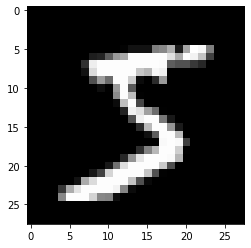

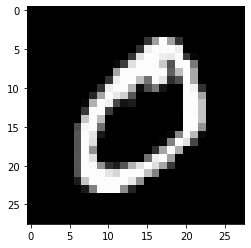

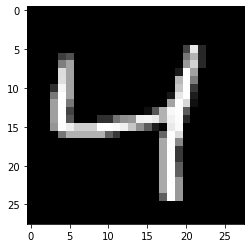

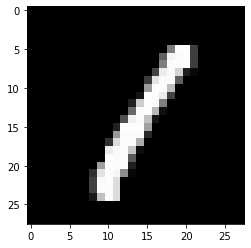

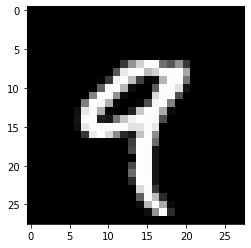

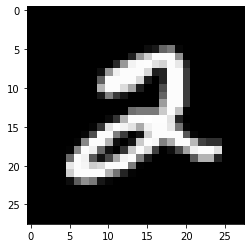

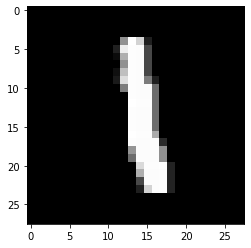

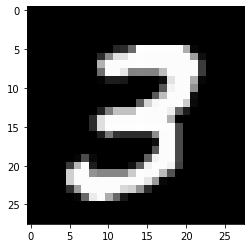

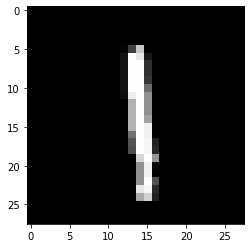

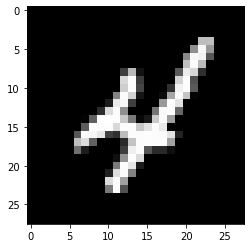

In [4]:
for i in range(0,10):
    plt.figure(i)
    plt.imshow(x_train[i],cmap='gray') 

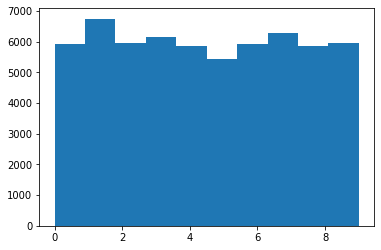

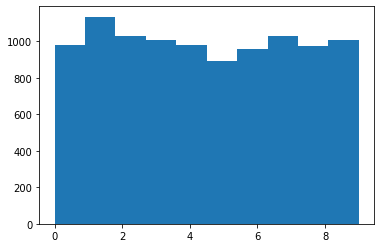

In [5]:
plt.figure(11)
y_train_hist_n=plt.hist(y_train)
plt.figure(12)
y_test_hist_n=plt.hist(y_test)


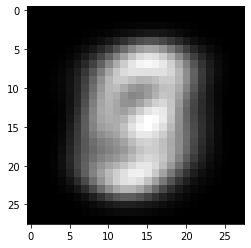

In [6]:
average_image = np.reshape(np.array([x_train[:,x,y].mean() 
    for x in range(0,28) for y in range(0,28)]),(28,28))
plt.figure(13)
plt.imshow(average_image,cmap='gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

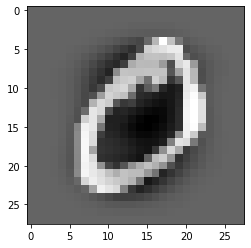

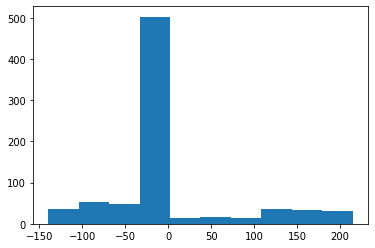

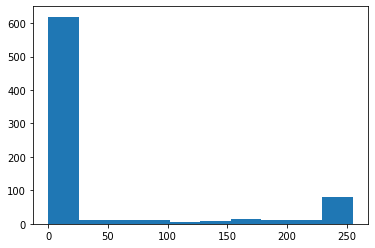

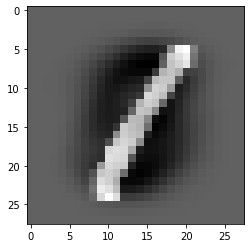

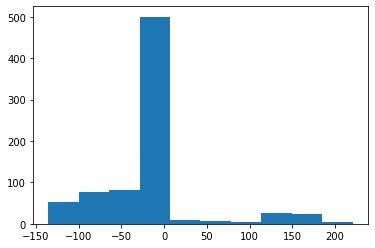

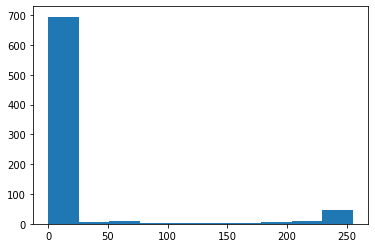

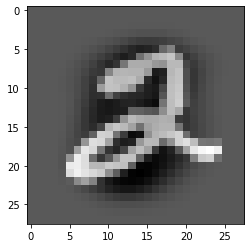

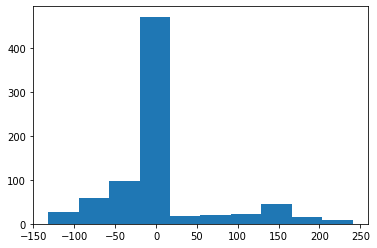

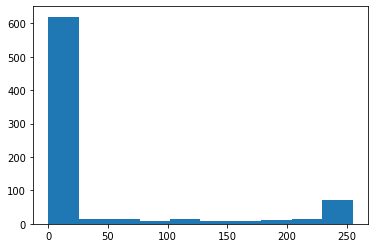

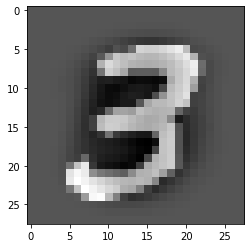

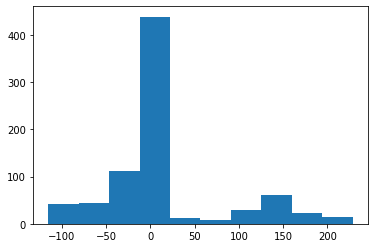

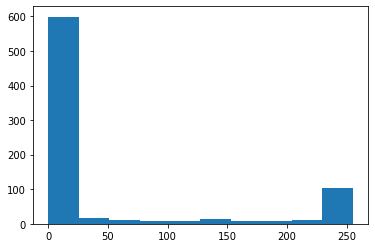

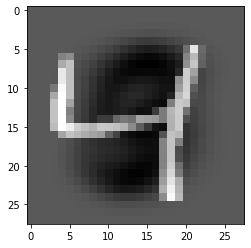

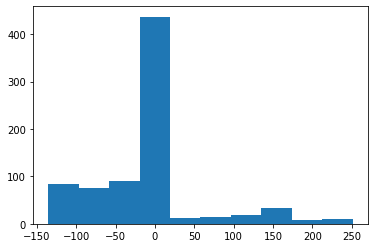

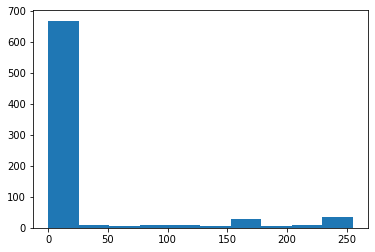

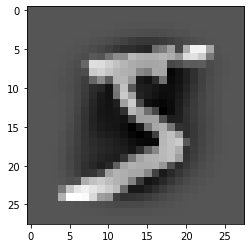

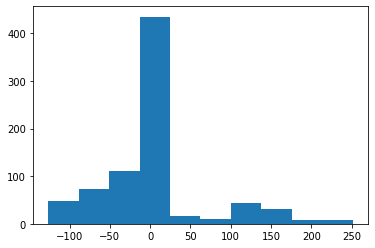

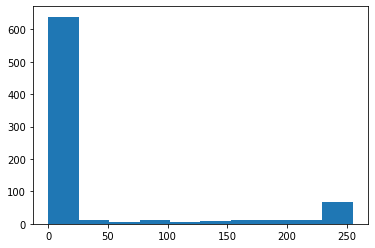

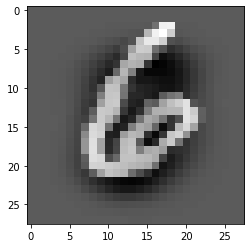

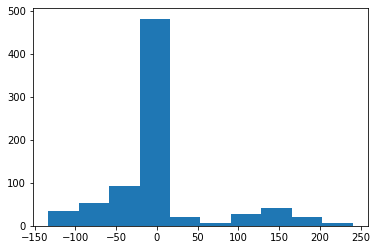

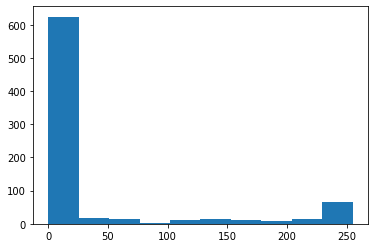

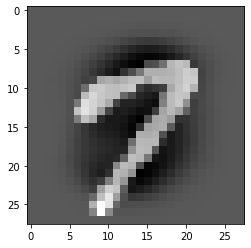

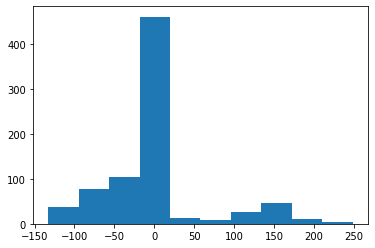

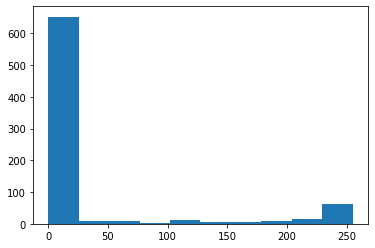

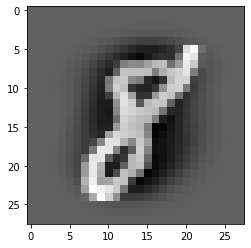

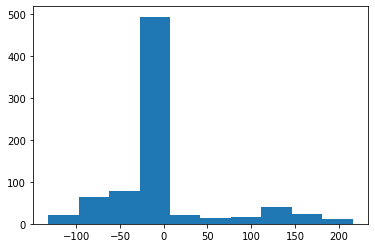

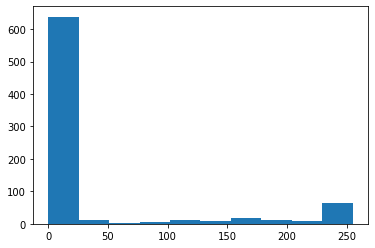

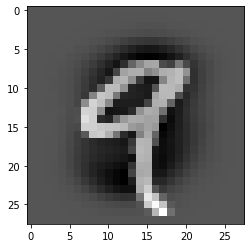

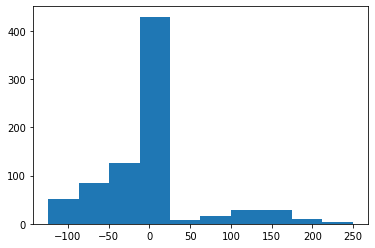

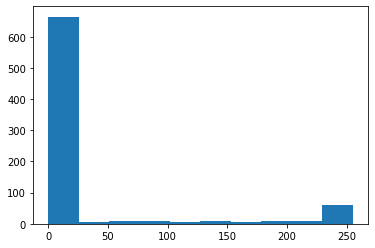

In [7]:
for i in range(0,10):
    
    img = x_train[np.where(y_train==i)[0][0] ,:,:]#erses Bilde von Klasse i ist 
    img_average = img -average_image
        
    # get some image
    plt.figure(i)
    plt.imshow(img_average,cmap="gray")

    plt.figure(i+100)
    plt.hist(img_average.flatten())
    plt.figure(i+200) 
    plt.hist(img.flatten())

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
import keras.backend as K
import gc

In [9]:
flat_input_train = np.reshape(x_train,(len(x_train),-1))
flat_input_train.shape

(60000, 784)

In [0]:
flat_input_train_minus_averaged=flat_input_train-img_average.flatten()

In [0]:
flat_input_test = np.reshape(x_test,(len(x_test),-1))
flat_input_test_minus_averaged=flat_input_test-img_average.flatten()


In [0]:
from keras.layers import Input

In [0]:
def create_model():
    
    model = Sequential()
   # model.add(Input(shape=(32,)))

    model.add(Dense(32, input_dim=flat_input_train.shape[1]))
    
    model.add(Dense(64,activation="relu"))
    
    # Final layer - choose the amount of classes
    model.add(Dense(10,activation="softmax"))
    return model



In [0]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

#print(y_train_cat.shape,y_train_cat[0:5,:])

In [0]:

optimizers_to_test = ["rmsprop"]#,'sgd',"adagrad","adadelta","adam","adamax","nadam"]
for optimizer in optimizers_to_test:
    print("optimizers_to_test :" ,optimizer)
    model = create_model()
    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    hist = model.fit(flat_input_train,y_train_cat,validation_data=\
              (flat_input_test,y_test_cat),epochs=15)
    
    plt.figure(999)
    plt.plot(hist.history["loss"])
    plt.title("Training Loss")
    #plt.imsave(optimizer.join("Training Loss"),hist.history["loss"])
    plt.savefig(optimizer.join("Training Loss"))
    plt.figure(998)
    plt.plot(hist.history["val_loss"])
    plt.title("Validation Loss")
    
    plt.figure(888)
    plt.plot(hist.history["acc"])
    plt.title("Trainings Accuracy")
    
    plt.figure(887)
    plt.plot(hist.history["val_acc"])
    plt.title("Validation Accuracy")

    del hist
    del model
    K.clear_session()
    gc.collect()


In [30]:
    plt.savefig(optimizer.join("Training Loss"))


<Figure size 432x288 with 0 Axes>